In [15]:
import os 

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

directory_path = '/projects/lortizur/cop_climate/era5/'

In [3]:
years = range(2005, 2015) # all years from 2005-2014 (10 year span)

# create list of file names from directory by checking for year within range defined above
# file name looks like: 'directory_path+download_daily_maximum_2m_temperature_2005_01.nc'
# each file is one month within that year
files_list = [directory_path+f for f in os.listdir(directory_path) if int(f[-10:-6]) in years]

# open list of files as single dataset 
ds=xr.open_mfdataset(files_list)
ds

<xarray.Dataset> Size: 15GB
Dimensions:      (time: 3652, lat: 721, lon: 1440)
Coordinates:
  * time         (time) datetime64[ns] 29kB 2005-01-01 2005-01-02 ... 2014-12-31
    realization  int64 8B 0
  * lat          (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon          (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    t2m          (time, lat, lon) float32 15GB dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2024-03-06T09:16 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF

In [ ]:
# group data by month, find mean
ds_month_mean=ds.groupby('time.month').mean()
ds_month_mean

<xarray.Dataset> Size: 50MB
Dimensions:      (month: 12, lat: 721, lon: 1440)
Coordinates:
    realization  int64 8B 0
  * lat          (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon          (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * month        (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t2m          (month, lat, lon) float32 50MB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2024-03-06T09:16 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF

Text(0.5, 0.98, 'Average monthly temperature Cº (at 2m)')

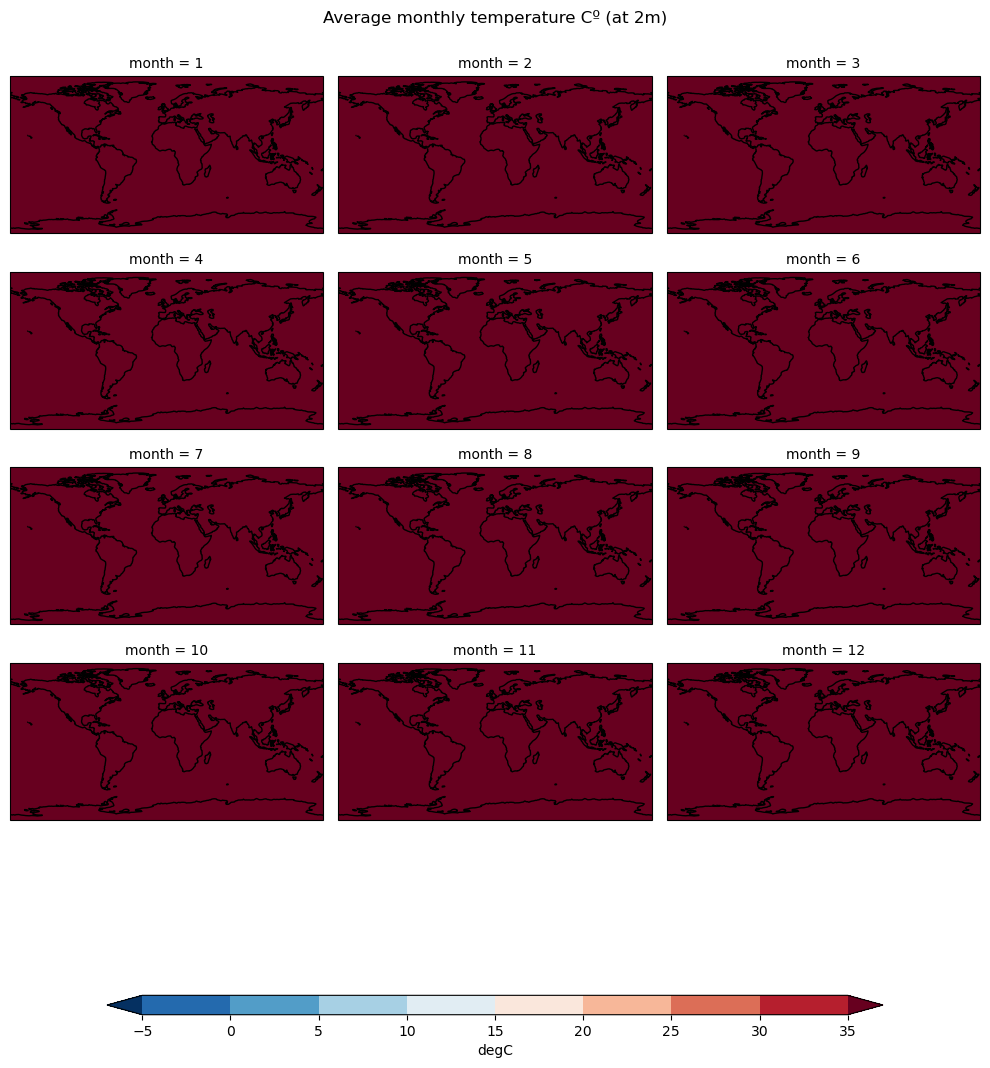

In [25]:
clevs = np.arange(-5, 36, 5)

fg = ds_month_mean['t2m'].plot.contourf(
    levels=clevs,
    row='month',
    col_wrap=3,
    robust=True,
    # cmap='RdBu_r',
    extend='both',
    subplot_kws={"projection": ccrs.PlateCarree()},
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "label": "degC",
    },
)

for ax in fg.axs.flat:
    ax.coastlines()

plt.suptitle('Average monthly temperature Cº (at 2m)')